# Single Layer Neural Networks

The first neural networks to be developed do not contain hidden layers. In this section, we will cover two main types of single layer networks: the McCulloch-Pitts (MCP) Network and the Perceptron. They look like the network that was shown in the previous section, but now we will write the inputs inside the nodes and slightly modify the notation:

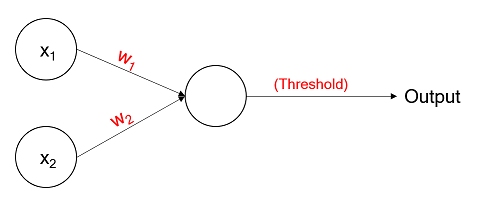

In [1]:
from IPython.display import Image
Image('activation2.png')

The biggest difference between the two networks is in their ability to learn. MCP Networks require a manual selection of weights and threshold values, while Perceptrons can determine those values by learning from a given training data.

Both networks work in the way described in the previous section. To iterate: the network takes a set of inputs, multiply these inputs by weights, and then outputs either a 0 or 1. If the sum of the products exceed the threshold, then an output of 1 is returned. Otherwise, the output value is 0. Mathematically, this means:

$$
output = \left\{ \begin{array}{rl}
 1 &\mbox{ if $x_{1}w_{1} + x_{2}w_{2} \geq threshold$} \\
 0 &\mbox{ if $x_{1}w_{1} + x_{2}w_{2} < threshold$}
       \end{array} \right.
$$

Now, in order to ease our implementation, we will move the threshold to the left side:

$x_{1}w_{1} + x_{2}w_{2} - threshold \geq 0\\$

We then define a new term, the bias, as $b=-threshold$. For this tutorial, however, we will use the notation $w_{0}$ to denote the bias instead of $b$. (Other tutorials/articles might use $b$, so it is just FYI.) We will also add another node - $x_{0}$ - to be associated with $w_{0}$.  $x_{0}$ is also called the **bias unit**, and its value is always equal to 1. Now the equation becomes: 

$x_{0}w_{0} + x_{1}w_{1} + x_{2}w_{2} \geq 0$

With this, we have three weights - $w_{0}$, $w_{1}$, $w_{2}$ - and we don't have to worry about the threshold. Our network with be represented with a bias unit instead of a threshold from here onwards, as seen in the graph below:

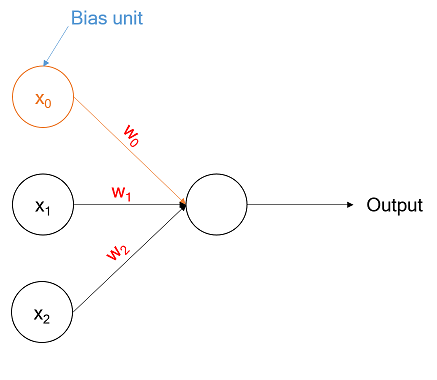

In [2]:
Image('activation3.png')

We will demonstrate these two networks by implementing **logic gates**. A logic gate is a building block of digital circuits. It takes two inputs, $x_{1}$ and $x_{2}$, whose values are either 0 or 1. There are seven basic gates: AND, OR, XOR, NOT, NAND, NOR, and XNOR.

Let's say we have the AND gate. When we pass all combinations of $x_{1}$ and $x_{2}$ through the gate, the output will be 1 only if both $x_{1}$ *and* $x_{2}$ is 1. We show the **truth table** of the AND gate below.

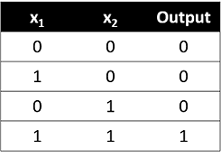

In [3]:
Image('ANDtruthtable.png')

A similar logic can be applied for the other gates. The OR gate will output a 1 if either $x_{1}$ *or* $x_{2}$ is a 1. You can also learn more about logic gates [here](http://whatis.techtarget.com/definition/logic-gate-AND-OR-XOR-NOT-NAND-NOR-and-XNOR).

## McCulloch-Pitts (MCP) Network

The McCulloch-Pitts network was developed in the 1940s. This type of network cannot learn - that is, the values of the weights must be determined beforehand and are fixed. Also, the input and output values can only be either 0's or 1's.

Let's visualize how it the network can act as an AND gate. Suppose we define the weights as $w_{0}=-3$, $w_{1}=2$, and $w_{1}=2$.

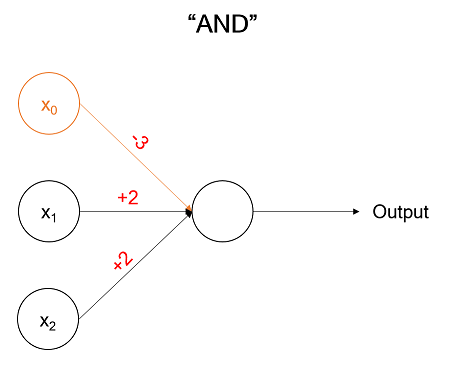

In [4]:
Image('andnn.png')

Recall that the value of $x_{0}$ is always 1, and the output will be 1 only if $x_{0}w_{0} + x_{1}w_{1} + x_{2}w_{2} \geq 0$. So, the activation will be greater than 0 only in the case where both $x_{1}$ *and* $x_{2}$ are 1!

Below is a code that implements logical operators. 

In [5]:
def McCulloch(weights):
    '''Given a list of 3 weights [w0, w1, w2], return a
    truth table dictionary'''
    
    # Initialization - all combinations of x1 and x2
    truth_table = {(0,0):0, (0,1):0, (1,0):0, (1,1):0}
    
    for x1, x2 in truth_table:
        
        # Sum of products of weight and input
        output = weights[0] + x1*weights[1] + x2*weights[2]
        
        # Output exceeds threshold
        if output >= 0:
            truth_table[(x1, x2)] = 1
    
    return truth_table

def displayTable(truth_table):
    '''Given a truth table dictionary, display it nicely'''
    
    print()
    print(' --------------------------')
    print('|   x1   |   x2   | Output |')
    print('|--------------------------|')
    
    for x1, x2 in truth_table:
        print('|    {0}   |    {1}   |    {2}   |'.format(x1,x2,truth_table[(x1,x2)]))
        
    print(' --------------------------')
    
def determineLogic(truth_table):
    '''Given a truth table dictionary, determine the
    logical operator it represents'''

    if truth_table[(0,0)] and truth_table[(1,1)]:
        return 'invalid'
    
    elif truth_table[(0,0)]:
        if truth_table[(0,1)] and truth_table[(1,0)]:
            return 'NAND'
        elif truth_table[(0,1)]:
            return 'NOT x1'
        elif truth_table[(1,0)]:
            return 'NOT x2'
        else:
            return 'NOR'
    
    elif truth_table[(1,1)]:
        if truth_table[(0,1)] and truth_table[(1,0)]:
            return 'OR'
        elif not (truth_table[(0,1)] or truth_table[(1,0)]):
            return 'AND'
        else:
            return 'invalid'
    
    else:
        return 'invalid'


Now, here comes the fun part! Try varying the values of the weights in the code below, and see which logical operators you can get. The preset weight values give the AND operator.

Note that you would be able to create only the AND, NAND, OR, NOR, and NOT gates. To create the XOR and XNOR gate, you would need another hidden layer.

In [6]:
#################################
# Vary the values of the weights!
w0 = -3
w1 = 2
w2 = 2
#################################

truth_table = McCulloch([w0,w1,w2])
displayTable(truth_table)
print('Logical operator:', determineLogic(truth_table))


 --------------------------
|   x1   |   x2   | Output |
|--------------------------|
|    0   |    1   |    0   |
|    1   |    0   |    0   |
|    0   |    0   |    0   |
|    1   |    1   |    1   |
 --------------------------
Logical operator: AND


## Perceptrons

In the late 1950s, perceptrons were developed. For perceptrons, the weights and threshold values can vary rather than being fixed, but the general idea is the same. The output value will be 1 if the sum of products of inputs and weights are greater or equal to the threshold, otherwise the output value is 0.

Unlike the MCP Network, the perceptron is a learning algorithm. This means that you won't have to specify the weights anymore - as long as you can give the correct outputs to input, with enough iterations and training examples, the network can learn the weights by itself!

The learning algorithm is as follows:

1. If Output is correct, then no changes are made to the threshold or weights.
2. If Output = 1 but should be 0, then increase threshold and decrease the weights.
3. If Output = 0 but should be 1, then decrease threshold and increase the weights.

Note that the weights are only changed if the corresponding input is 1. That is, if $x_{1}=0$ and $x_{2}=1$, only $w_{2}$ will be updated.

The learning algorithm (designed for computing logical operators) is implemented below. The returned weights are in the format of $[w_{0}, w_{1}, w_{2}]$. As explained earlier, $w_{0} = -threshold$.

In [7]:
from random import choice

def perceptrons(truth_table, i):
    '''Given a truth table dictionary, return the weights w0, w1, and w2,
    where w0 = -threshold'''
    
    # Initialize weights and threshold
    weights = [0,0]
    t = 0
    
    for iterations in range(i):
        
        # Randomly choose training example
        x1, x2 = choice(list(truth_table.keys()))
        correct_output = truth_table[(x1,x2)]
        
        # Predict the output
        if (weights[0]*x1 + weights[1]*x2) >= t:
            output = 1
        else:
            output = 0
        
        # Learning algorithm: update the weights and threshold
        # Note that if output = correct_output, nothing is updated
        # Also only update weights if x1 or x2 is 1
        weights[0] += (correct_output-output)*x1
        weights[1] += (correct_output-output)*x2
        t -= (correct_output-output)
    
    # Corresponds to [w0, w1, w2]
    return [-t] + weights

def LogicToTruthTable(logic):
    '''Given the logical operator, return the truth table
    corresponding to that operator'''
    
    logic = logic.upper()
    
    if logic == 'AND':
        truth_table = {(0,0):0, (0,1):0, (1,0):0, (1,1):1}
        
    elif logic == 'OR':
        truth_table = {(0,0):0, (0,1):1, (1,0):1, (1,1):1}
        
    elif logic == 'NOR':
        truth_table = {(0,0):1, (0,1):0, (1,0):0, (1,1):0}
    
    elif logic == 'NAND':
        truth_table = {(0,0):1, (0,1):1, (1,0):1, (1,1):0}
    
    elif logic == 'NOT X1':
        truth_table = {(0,0):1, (0,1):1, (1,0):0, (1,1):0}
    
    elif logic == 'NOT X2':
        truth_table = {(0,0):1, (0,1):0, (1,0):1, (1,1):0}
    
    else:
        return 'invalid input'
    
    return truth_table

Now you can try to experiment by changing the logical operators below (AND, NAND, OR, NOR, NOT x1, and NOT x2), and see what values of weights are returned!

The program also double-checks these weight values into the McCulloch-Pitts network.

In [8]:
###############################################
# Try varying the logical operators!
logical_operator = 'AND'

###############################################

print('Given logical operator: ', logical_operator)
truth_table = LogicToTruthTable(logical_operator)
weights = perceptrons(truth_table, 1000)
print('Weights calculated by perceptron:', weights)
print()

# Double checking
print('Entering the calculated weights into the McCulloch Pitts network...')
truth_check = McCulloch(weights)
displayTable(truth_check)
print('Logical operator:', determineLogic(truth_check))

print()
if determineLogic(truth_check).upper() == logical_operator.upper():
    print('Perceptrons performed successfully.')
    
else:
    print('Perceptrons failed to perform successfully.')


Given logical operator:  AND
Weights calculated by perceptron: [-2, 1, 1]

Entering the calculated weights into the McCulloch Pitts network...

 --------------------------
|   x1   |   x2   | Output |
|--------------------------|
|    0   |    1   |    0   |
|    1   |    0   |    0   |
|    0   |    0   |    0   |
|    1   |    1   |    1   |
 --------------------------
Logical operator: AND

Perceptrons performed successfully.


Now, let us move on to the next section: multi-layer neural networks!

## References & Further Readings

- [A Basic Introduction to Neural Networks](http://www.webpages.ttu.edu/dleverin/neural_network/neural_networks.html)
- [Coursera: Machine Learning](https://www.coursera.org/learn/machine-learning)
- [Neural Networks and Deep Learning: Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html)
- [Single-layer Neural Networks (Perceptrons)](http://computing.dcu.ie/~humphrys/Notes/Neural/single.neural.html)
- [Logic Gates](http://whatis.techtarget.com/definition/logic-gate-AND-OR-XOR-NOT-NAND-NOR-and-XNOR)